In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv("./results/results.csv")
print(len(df))
df.head(5)

240


,cpu_architecture,cpu_core_count,cpu_model_name,cpu_clock_speed_(MHz),total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,storage_devices,...,distance_metric,query_size,peak_dram_(MB),peak_WSS_(MB),index,index_type,dtype,latency_(s),recall1,recall2
0,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,4333511,21820,73106996224,7499087872,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,199.808594,199.808594,deep10K_96D_float32.spann,spann,float32,0.088165,1.000,1.0
1,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,4335434,21820,73136659456,7499087872,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,201.562500,201.562500,deep10K_96D_float32.spann,spann,float32,0.079325,1.000,1.0
2,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,4337357,21820,73166322688,7499087872,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,201.992188,201.992188,deep10K_96D_float32.spann,spann,float32,0.079131,0.994,1.0
3,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,4338639,21820,73186098176,7499087872,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,205.597656,205.597656,deep10K_96D_float32.spann,spann,float32,0.055593,0.996,1.0
4,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,4341203,21820,73226525696,7499087872,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,20,203.042969,205.597656,deep10K_96D_float32.spann,spann,float32,0.072132,1.000,1.0


In [9]:
df['throughput'] = df['query_size'] / df['latency_(s)']
k_values = df['k'].unique()

In [10]:
df = df[df['dtype'] == 'float32']
# df = df[df['recall2'] == 0]
df[['throughput', 'recall1', 'recall2']]

,throughput,recall1,recall2
0,113.423637,1.000000,1.000000
1,126.063725,1.000000,1.000000
2,126.372903,0.994000,1.000000
3,179.877174,0.996000,1.000000
4,277.268109,1.000000,1.000000
...,...,...,...
235,1077.254042,0.923641,0.983929
236,1078.745963,0.984000,0.984000
237,1079.357189,0.972240,0.984000
238,1079.026006,0.945538,0.984000


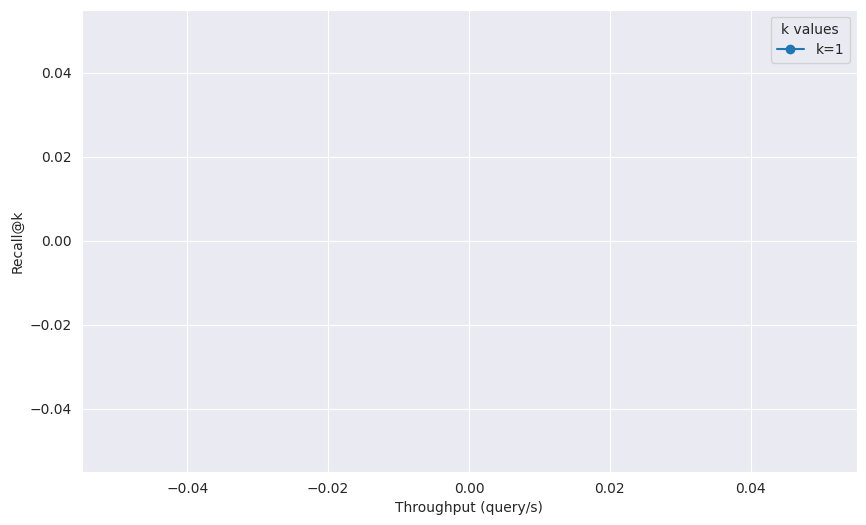

In [11]:
plt.figure(figsize=(10, 6))

for k in range(1, 2):
    subset = df[df['k'] == 100]
    subset = subset[subset['index_type'] == 'annoy']
    subset = subset[subset['query_size'] == 10000]
    plt.plot(subset['latency_(s)'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('Overall Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

/tmp/ipykernel_86364/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_86364/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_86364/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_86364/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]


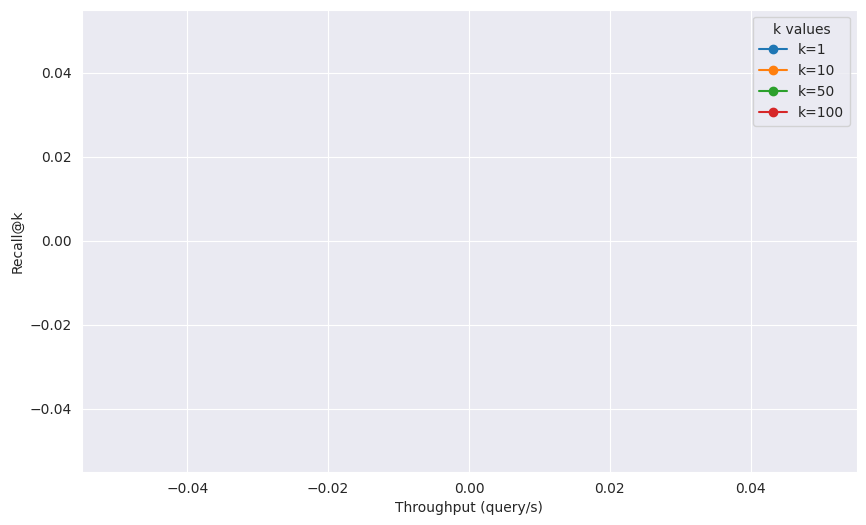

In [12]:
plt.figure(figsize=(10, 6))

for k in k_values:
    annoy = df[df['index_type'] == 'annoy']
    subset = annoy[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('ANNOY Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

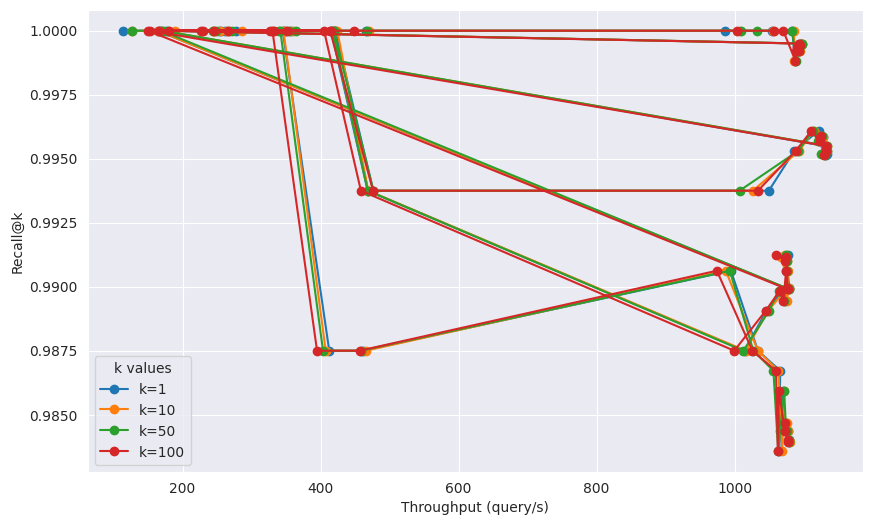

In [13]:
plt.figure(figsize=(10, 6))

for k in k_values:
    spann = df[df['index_type'] == 'spann']
    subset = spann[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

In [14]:
recalls = pd.DataFrame()
for k in k_values:
    subset = df[df['k'] == k]
    recalls[k] = subset['recall2'].mean()
recalls

,1,10,50,100


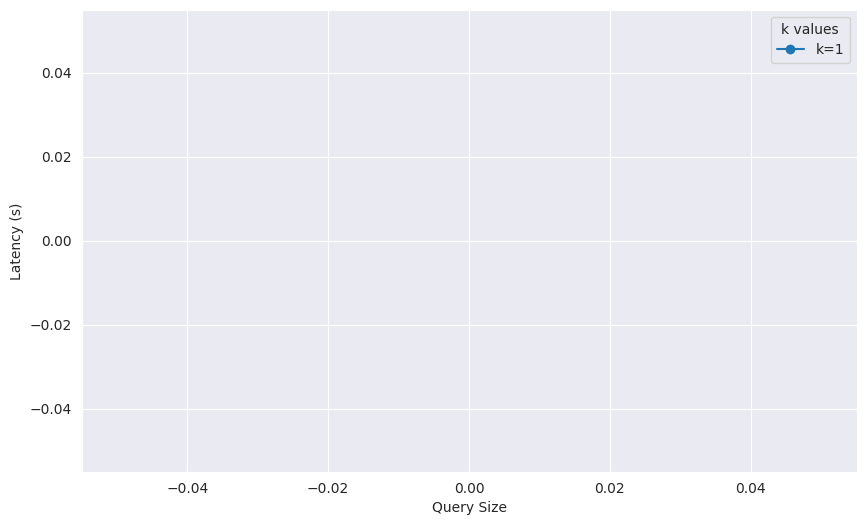

In [15]:
plt.figure(figsize=(10, 6))

for k in range(1, 2):
    spann = df[df['index_type'] == 'annoy']
    subset = spann[spann['k'] == k]
    plt.plot(subset['index_size'], subset['latency_(s)'], marker='o', label=f'k={k}')

plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
# plt.title('Query Size vs Latency(s)')
plt.grid(True)
plt.legend(title='k values')
plt.show()